### VaMoS'23

Two goals:
- launching some graphs about the coreutils data
- computing correlations between #locs, #runtime options and binary size of small programs extracted out of coreutils, see https://github.com/coreutils/coreutils

### Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

### Importing data

In [2]:
df = pd.read_csv("../measures/table1.csv")
df = df.dropna().reset_index()
df

,index,name,loc,binary,runtime
0,2,basename,133.0,165.0,3
1,3,cat,526.0,186.0,7
2,4,chcon,447.0,310.0,9
3,5,chgrp,250.0,301.0,7
4,6,chmod,436.0,286.0,7
...,...,...,...,...,...
88,92,users,104.0,169.0,0
89,94,wc,808.0,252.0,6
90,95,who,621.0,198.0,14
91,96,whoami,59.0,163.0,0


### Figures

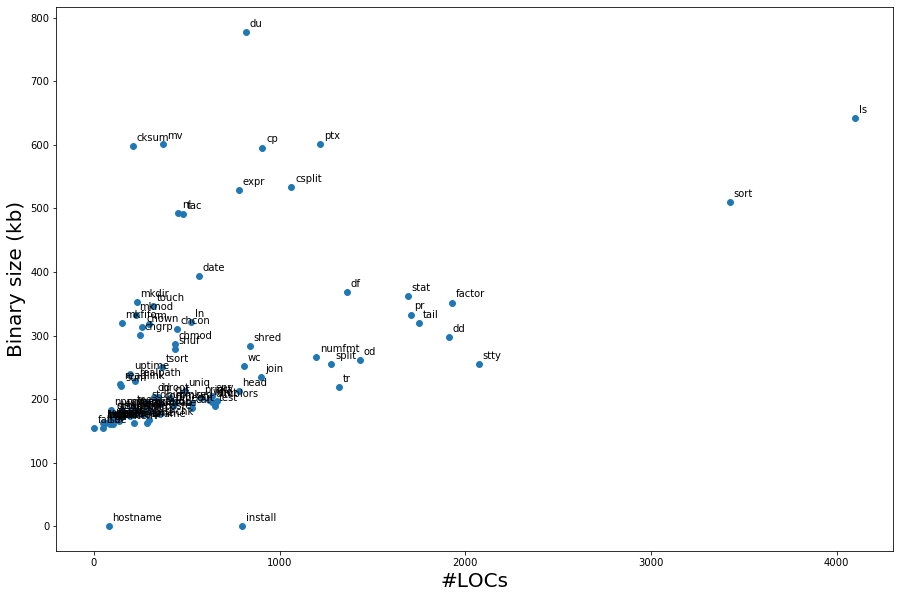

In [3]:
plt.figure(figsize=(15,10))

loc = df['loc']
binn = df['binary']
name = df['name']

plt.scatter(loc, binn, s= 35)

for i in range(len(binn)):
    plt.text(20+loc[i], 8+binn[i], name[i])

plt.ylabel("Binary size (kb)", fontsize =20)
plt.xlabel("#LOCs", fontsize = 20)
plt.savefig("../figures/kb_loc.png", dpi =300)
plt.show()

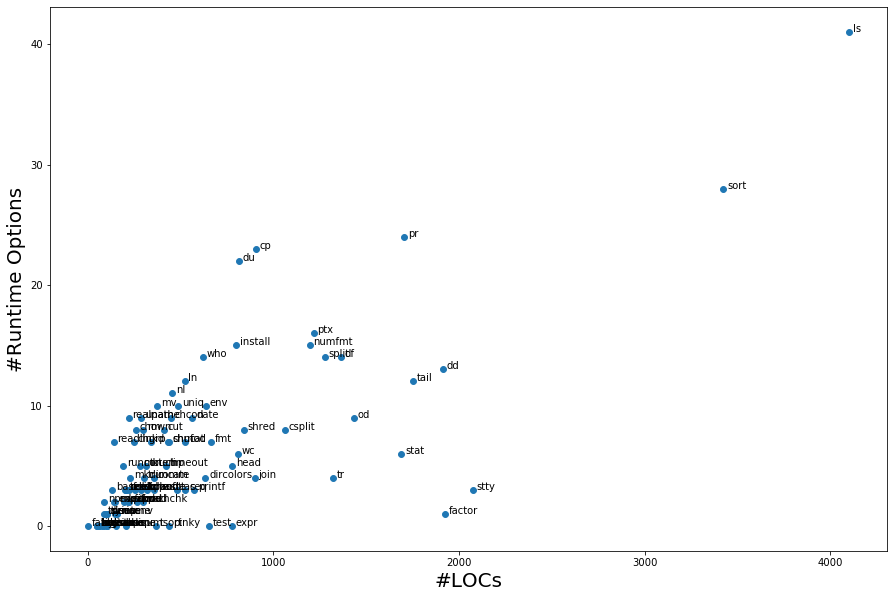

In [4]:
plt.figure(figsize=(15,10))

loc = df['loc']
runt = np.array(df['runtime'], dtype=float)
name = df['name']

plt.scatter(loc, runt, s= 35)

for i in range(len(loc)):
    plt.text(20+loc[i], runt[i], name[i])

plt.ylabel("#Runtime Options", fontsize =20)
plt.xlabel("#LOCs", fontsize = 20)
plt.savefig("../figures/run_loc.png", dpi =300)
plt.show()

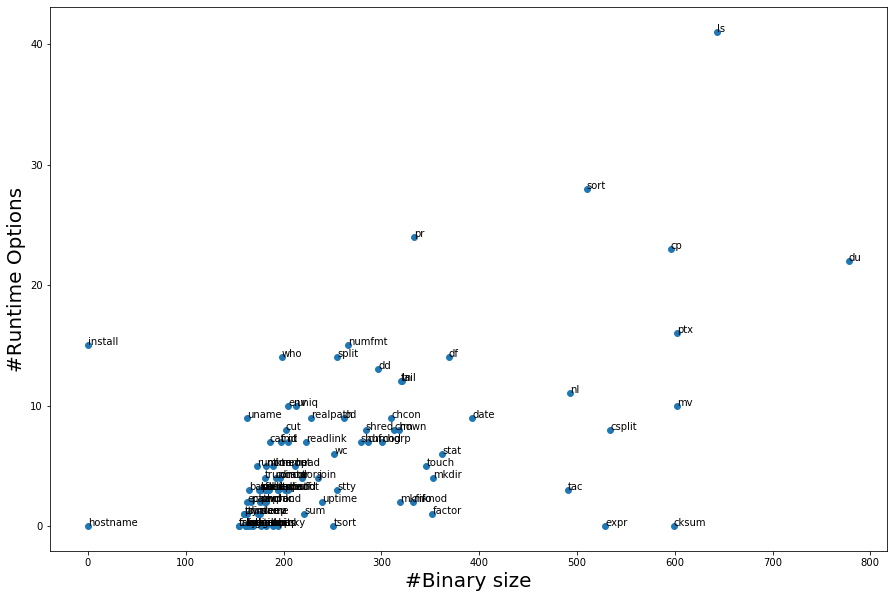

In [5]:
plt.figure(figsize=(15,10))

binn = df['binary']
runt = np.array(df['runtime'], dtype=float)
name = df['name']

plt.scatter(binn, runt, s= 35)

for i in range(len(loc)):
    plt.text(binn[i], runt[i], name[i])

plt.ylabel("#Runtime Options", fontsize =20)
plt.xlabel("#Binary size", fontsize = 20)
plt.savefig("../figures/run_kb.png", dpi =300)
plt.show()

### Correlations

#### Binary size x runtime 

In [6]:
#Pearson
np.corrcoef(binn, runt)[0,1]

0.5743654699232518

In [7]:
# Spearman
spearmanr(binn, runt)

SpearmanrResult(correlation=0.587240604503143, pvalue=6.12915234043042e-10)

#### LOC x runtime 

In [8]:
#Pearson
np.corrcoef(loc, runt)[0,1]

0.7410592255783667

In [9]:
# Spearman
spearmanr(loc, runt)

SpearmanrResult(correlation=0.6999582143556253, pvalue=5.863111208341474e-15)

#### Binary size x LOC

In [10]:
#Pearson
np.corrcoef(binn, loc)[0,1]

0.48487121131707656

In [11]:
# Spearman
spearmanr(binn, runt)

SpearmanrResult(correlation=0.587240604503143, pvalue=6.12915234043042e-10)